In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy
import matplotlib.path as mpath
from functions import compute_ivt,to_nc
from matplotlib import rc,animation
from matplotlib.animation import FuncAnimation
from IPython import display

In [2]:
AR = xr.open_dataset('2014.nc')

In [3]:
AR

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 365)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
Data variables:
    ivt      (time, lat, lon) float64 ...

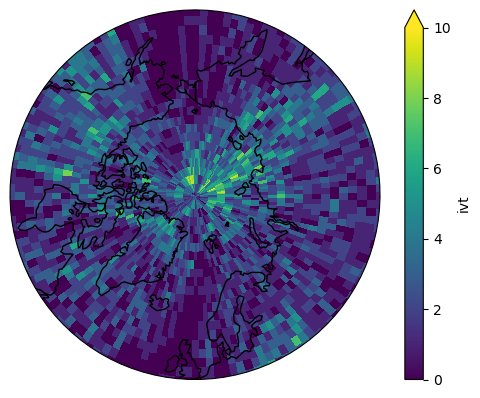

In [12]:
ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax1.set_extent([-180,180,50,90], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND,edgecolor='k',zorder=4,facecolor=(0.5,0.5,0.5,0))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

xr.plot.pcolormesh(AR.ivt.sum(dim='time'),transform=ccrs.PlateCarree(),vmax=10)
plt.show()

In [15]:
wille = xr.open_dataset('../../data/AR_detection_2020.nc4')
wille

<xarray.Dataset>
Dimensions:        (time: 2928, lat: 361, lon: 576)
Coordinates:
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time           (time) datetime64[ns] 2020-01-01 ... 2020-12-31T21:00:00
Data variables:
    ar_binary_tag  (time, lat, lon) int8 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.0rc2 (https://mpimet.mpg...
    Conventions:  CF-1.6
    description:  ARTMIP file format (Ullrich)
    history:      Tue May  3 12:22:37 2022: ncks -4 -L 1 temp_MERRA2.ar_tag.W...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.0rc4 (https://mpimet.mpg...

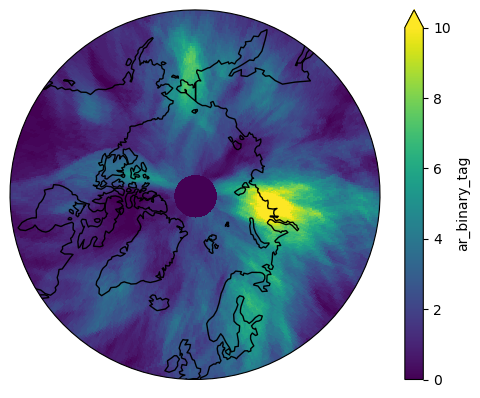

In [16]:
ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax1.set_extent([-180,180,50,90], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND,edgecolor='k',zorder=4,facecolor=(0.5,0.5,0.5,0))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

xr.plot.pcolormesh(wille.ar_binary_tag.sum(dim='time')/8,transform=ccrs.PlateCarree(),vmax=10)
plt.show()

In [17]:
AR = xr.open_dataset('2014_400.nc')

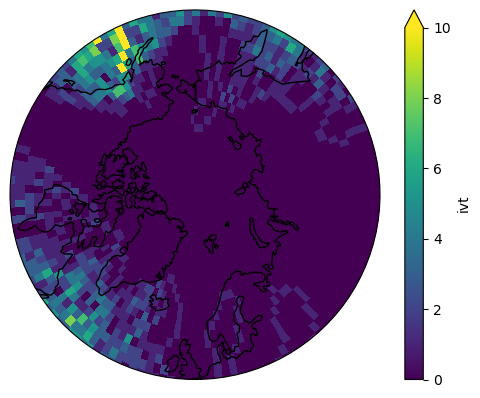

In [18]:
ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax1.set_extent([-180,180,50,90], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND,edgecolor='k',zorder=4,facecolor=(0.5,0.5,0.5,0))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

xr.plot.pcolormesh(AR.ivt.sum(dim='time'),transform=ccrs.PlateCarree(),vmax=10)
plt.show()

In [1]:
ivt_ns = ivt.copy()
ivt_ns = xr.where(ivt_ns.lat<0,-ivt_ns,ivt_ns,True) # minus for southern hemisphere (positive toward the pole)
ivt_ns_pos = xr.where(ivt_ns<0,ivt_ns*0,ivt_ns,True) # negative values = not poleward
ivt_ns_pos

NameError: name 'ivt' is not defined

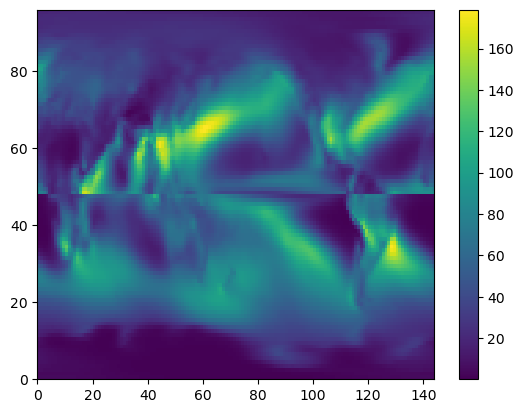

In [36]:
plt.pcolormesh(ivt_ns_pos.mean(dim='time'))
plt.colorbar()
plt.show()

In [60]:
q98 = ivt_ns_pos.chunk(dict(time=-1)).quantile(0.98,'time')

<xarray.DataArray 'lat' (lat: 96, lon: 144)>
dask.array<getitem, shape=(96, 144), dtype=float64, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    quantile  float64 0.98
(96, 5475, 144)


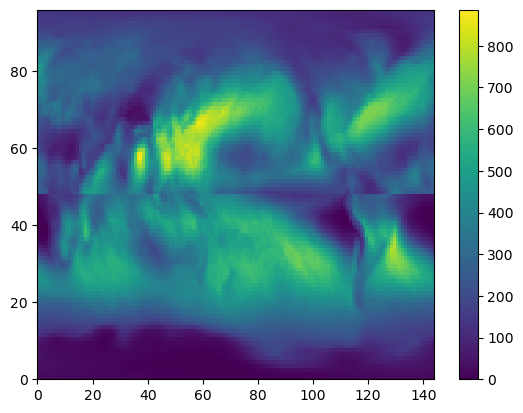

In [43]:
plt.pcolormesh(q98)
plt.colorbar()
plt.show()